
## Dataset Overview
The dataset contains information about housing in California, including geographical coordinates, housing characteristics, income , demographics, and median house values.


## 1. Data Preprocessing

### 1.1 Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, pearsonr


### 1.2 Load and Parse Data


In [2]:
# Load the housing dataset
df = pd.read_csv('housing.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

print('Unique values in Ocean_proximity ', df['ocean_proximity'].unique())


Dataset loaded successfully!
Dataset shape: (20640, 10)
Columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']
Unique values in Ocean_proximity  ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [3]:

print("First 5 rows:")
print(df.head())
print("\n" + "="*50 + "\n")
print("Dataset Info:")
print(df.info())
print("\n" + "="*50 + "\n")
print("Basic Statistics:")
print(df.describe())


First 5 rows:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIn

### 1.3 Data Cleaning and Organization


In [4]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Convert ocean_proximity to categorical
df['ocean_proximity'] = df['ocean_proximity'].astype('category')

print("\nData cleaning completed!")
print(f"Final dataset shape: {df.shape}")
print(f"Data types:\n{df.dtypes}")


Missing values per column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Total missing values: 207

Data cleaning completed!
Final dataset shape: (20640, 10)
Data types:
longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity       category
dtype: object


### 1.4 Median Imputation for Missing Values


In [5]:
# Median Imputation for Missing Values
print("Median Imputation:")
print("Original missing values in total_bedrooms: 207")

# Load fresh data to show the process
df_fresh = pd.read_csv('housing.csv')
print(f"Fresh data missing values: {df_fresh['total_bedrooms'].isnull().sum()}")

# Apply median imputation
df_fresh['total_bedrooms'].fillna(df_fresh['total_bedrooms'].median(), inplace=True)
print(f"After median imputation: {df_fresh['total_bedrooms'].isnull().sum()}")
print(f"Median bedrooms: {df_fresh['total_bedrooms'].median():.2f}")
print("Median imputation completed!")


Median Imputation:
Original missing values in total_bedrooms: 207
Fresh data missing values: 207
After median imputation: 0
Median bedrooms: 435.00
Median imputation completed!


/var/folders/2l/ljzs34f919b33nzj6tt0wwbr0000gn/T/ipykernel_80042/1569782444.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fresh['total_bedrooms'].fillna(df_fresh['total_bedrooms'].median(), inplace=True)


## 2. Basic Data Exploration and Summary Statistics


In [6]:
# Basic summary statistics
print("DATASET SUMMARY")

print(f"Dataset Dimensions: {df.shape[0]} rows x {df.shape[1]} columns")


DATASET SUMMARY
Dataset Dimensions: 20640 rows x 10 columns


In [7]:
print("NUMERICAL FEATURES SUMMARY")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(df[numerical_cols].describe())

NUMERICAL FEATURES SUMMARY
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499

In [8]:
print("CATEGORICAL FEATURES SUMMARY")
categorical_cols = df.select_dtypes(include=['category', 'object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Value counts:")
    print(df[col].value_counts().head(10))

CATEGORICAL FEATURES SUMMARY

ocean_proximity:
  Unique values: 5
  Value counts:
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


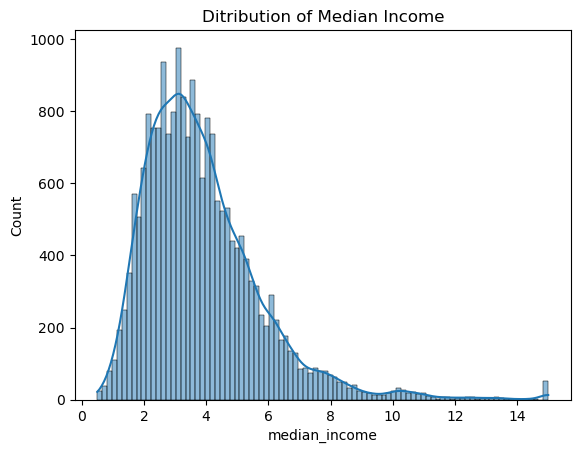

In [9]:

# Unvariate analysis of the median income 

sns.histplot(df['median_income'], kde=True)
plt.title('Ditribution of Median Income')
plt.show()

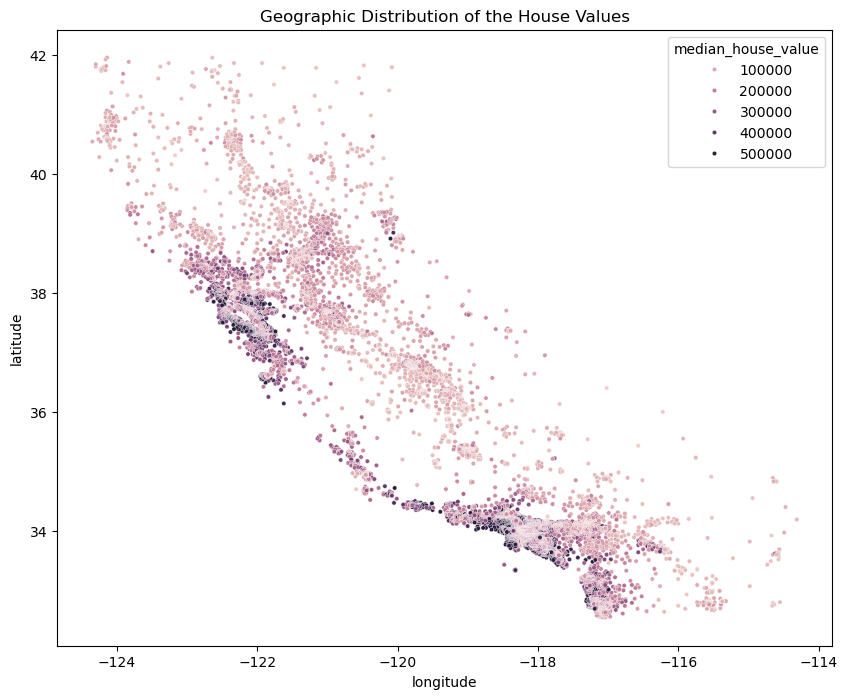

In [10]:
# Geographic visualization of the data 

plt.figure(figsize=(10,8))

sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value', s=10)

plt.title('Geographic Distribution of the House Values')

plt.show()

## 3. Statistical Analysis and Hypothesis Testing

### 3.1 Analysis 1: Dataset Characteristics and Feature Distribution Analysis


T-test: Coastal vs. Inland Median Income

T-stat=39.528, p-value=0.00000


/var/folders/2l/ljzs34f919b33nzj6tt0wwbr0000gn/T/ipykernel_80042/3383475916.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['ocean_proximity'].isin(['NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND']),


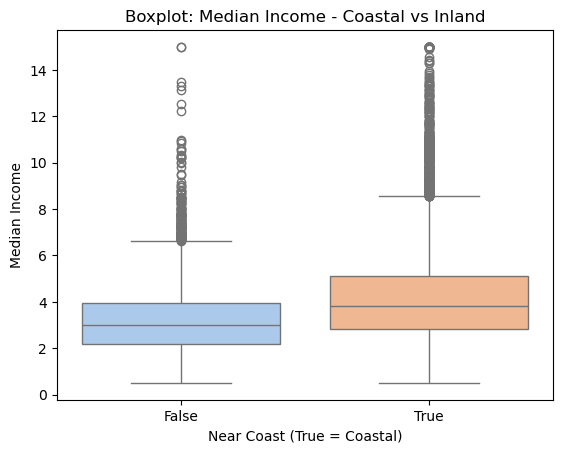

In [ ]:

# Using the T-test for income difference between coastal and inland regions 
# - Unique values in Ocean_proximity  ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
inland = df[df['ocean_proximity'].isin(['INLAND'])]['median_income']
coastal = df[~df['ocean_proximity'].isin(['INLAND'])]['median_income']

tstat, t_pval = ttest_ind(coastal, inland, equal_var=False)
print("T-test: Coastal vs. Inland Median Income\n")
print(f"T-stat={tstat:.3f}, p-value={t_pval:.5f}")

sns.boxplot(x=df['ocean_proximity'].isin(['NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND']),
            y='median_income', data=df,
            showfliers=True, palette='pastel')
plt.xlabel("Near Coast (True = Coastal)")
plt.ylabel("Median Income")
plt.title("Boxplot: Median Income - Coastal vs Inland")
plt.show()


Chi-square Test: 

Chi^2 = 3185.847, p-value=0.00000


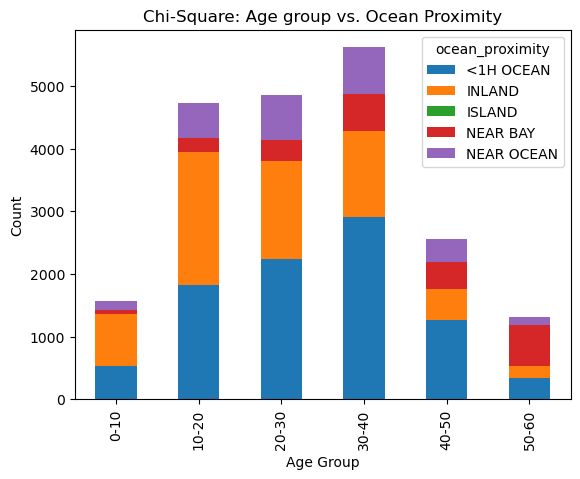

In [ ]:
# Used the Chi-square test for the relationship between ocean proximity and house age group 
# We used the method below to remind ourselves the range of the housing median age
# print(max(df['housing_median_age']))
# print(min(df['housing_median_age']))

df['age_group'] = pd.cut(df['housing_median_age'], bins=[0, 10, 20, 30, 40, 50, 60],
                         labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60'])

contingency = pd.crosstab(df['age_group'], df['ocean_proximity'])
chi2, c_pval, dof, exp = chi2_contingency(contingency)

print("Chi-square Test: \n")
print(f"Chi^2 = {chi2:.3f}, p-value={c_pval:.5f}")

pd.crosstab(df['age_group'], df['ocean_proximity']).plot(kind='bar', stacked=True)
plt.title('Chi-Square: Age group vs. Ocean Proximity')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

ANOVA: Median House Value by Ocean Proximity 

F-Stat=1612.141, p-value=0.00000


/var/folders/2l/ljzs34f919b33nzj6tt0wwbr0000gn/T/ipykernel_80042/2353570045.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['median_house_value'] for name, group in df.groupby('ocean_proximity')]


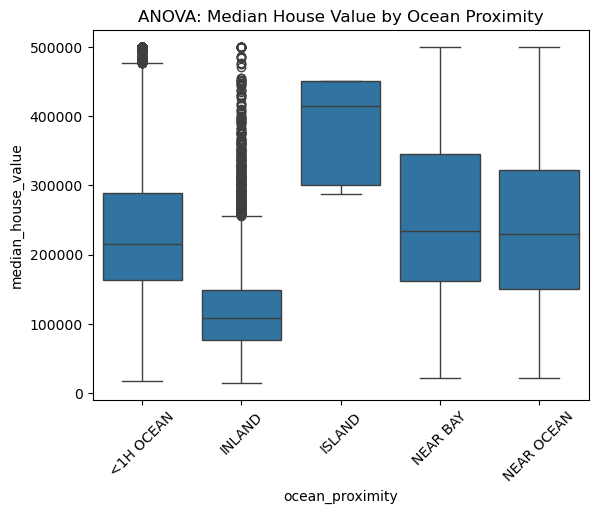

In [ ]:
# Used ANOVA for median house value by ocean proximity 

groups = [group['median_house_value'] for name, group in df.groupby('ocean_proximity')]
fstat, a_pval = f_oneway(*groups)
print("ANOVA: Median House Value by Ocean Proximity \n")
print(f"F-Stat={fstat:.3f}, p-value={a_pval:.5f}")

sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title('ANOVA: Median House Value by Ocean Proximity')
plt.xticks(rotation=45)
plt.show()


In [14]:

# Here we create a new dataframe summarizing the findings from the stat analysis 

summary = pd.DataFrame({
    "Method": ["T-test", "Chi-square", "ANOVA"],
    
    "Question" :["Do coastal areas have higher income than inland?", 
                 "Is there a relationship between house age and proximity to ocean?",
                 "Do house values differ significantly by ocean proximity?"],
    
    "Null Hypothesis" : [
        "There is no difference in median income level between coastal areas and inland areas",
        "House age group and ocean proximity are indepdent",
        "Average house values are the same across all ocean proximity categories"
    ],
    
    "Alternative Hypothesis" : [
        "Coastal and inland areas have different median incomes",
        "House age group and ocean proximity are dependent (there is a relationship)",
        "At least one ocean proximity group has a different average house value",
    ],
    
    "Result" : [
        f"p = {t_pval:5f} < 0.05 -> Significant Difference (Reject H_0)",
        f"p = {c_pval:.5f} < 0.05 -> Significant relationship (Reject H_0)",
        f"p = {a_pval:.5f} < 0.05 -> Significant differnece among categories (Reject H_0)"
    ],
    
    "Conclusion" : [
        "Coastal areas have significantly higher income levels.",
        "Older homes are more inland while newer ones cluster near coasts.",
        "Ocean proximity strongly affects house value, in other words, coastal homes are more expensive"
    ]
})

display(summary)

,Method,Question,Null Hypothesis,Alternative Hypothesis,Result,Conclusion
0,T-test,Do coastal areas have higher income than inland?,There is no difference in median income level ...,Coastal and inland areas have different median...,p = 0.000000 < 0.05 -> Significant Difference ...,Coastal areas have significantly higher income...
1,Chi-square,Is there a relationship between house age and ...,House age group and ocean proximity are indepdent,House age group and ocean proximity are depend...,p = 0.00000 < 0.05 -> Significant relationship...,Older homes are more inland while newer ones c...
2,ANOVA,Do house values differ significantly by ocean ...,Average house values are the same across all o...,At least one ocean proximity group has a diffe...,p = 0.00000 < 0.05 -> Significant differnece a...,"Ocean proximity strongly affects house value, ..."
